In [2]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_mean_std(loader):
    mean = 0.
    std = 0.
    total_images_count = 0
    for images,_ in loader:
        images_count_in_batch = images.size(0)
#         print(images.shape)
        images =images.view(images_count_in_batch,images.size(1),-1)
        mean+=images.mean(2).sum(0)
        std+=images.std(2).sum(0)
        total_images_count+=images_count_in_batch
    mean /= total_images_count
    std /= total_images_count
    return mean,std

In [4]:
def tain_transform():
    training_dataset='../Datasets/dataset_2_classes/train/'
    training_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])
    train_dataset=torchvision.datasets.ImageFolder(root=training_dataset,transform=training_transforms)
    train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=32,shuffle=True)
    mean,std=get_mean_std(train_loader)
    train_transforms = transforms.Compose([
        transforms.Resize((255,255)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))
    ])
    train_dataset=torchvision.datasets.ImageFolder(root=training_dataset,transform=training_transforms)
    train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=32,shuffle=True)
    return train_loader,train_dataset

In [5]:
train_loader,train_dataset=tain_transform()

In [6]:
def show_transformed_images(dataset):
    loader=torch.utils.data.DataLoader(dataset, batch_size=12,shuffle=True)
    batch=next(iter(loader))
    images, labels=batch
    
    grid=torchvision.utils.make_grid(images, nrow=3)
    plt.figure(figsize=(11,11))
    plt.imshow(np.transpose(grid,(1,2,0)))
    print('labels: ',labels)

labels:  tensor([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])


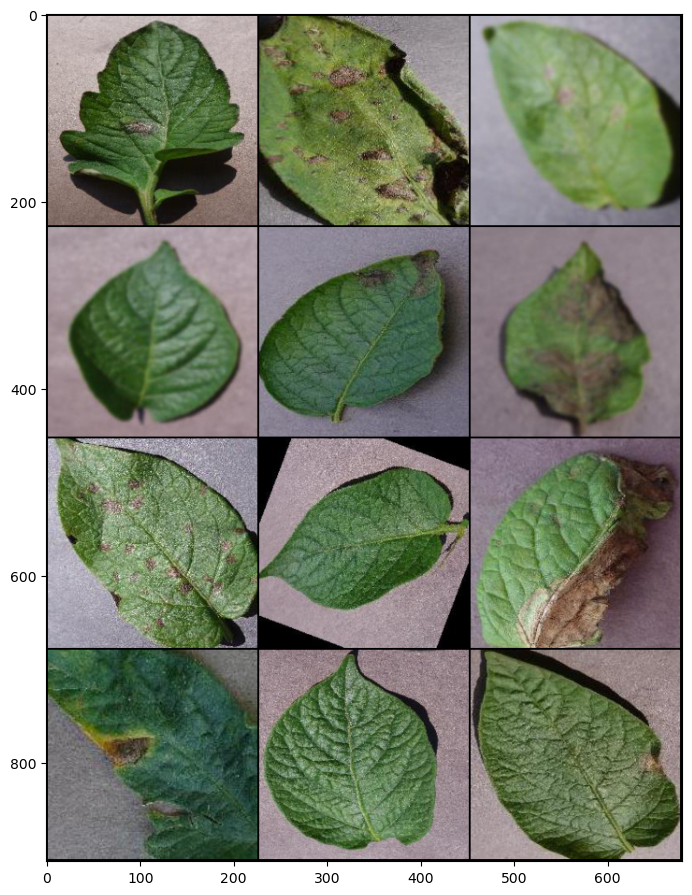

In [7]:
show_transformed_images(train_dataset)

In [1]:
def valdate_transform(dataset):
    validate_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])
    validate_dataset=torchvision.datasets.ImageFolder(root=dataset,transform=validate_transforms)
    validate_loader=torch.utils.data.DataLoader(dataset=validate_dataset,batch_size=32,shuffle=True)
    mean,std=get_mean_std(validate_loader)
    validate_transforms = transforms.Compose([
        transforms.Resize((255,255)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))
    ])
    validate_dataset=torchvision.datasets.ImageFolder(root=dataset,transform=validate_transforms)
    validate_loader=torch.utils.data.DataLoader(dataset=validate_dataset,batch_size=32,shuffle=True,drop_last=False,num_workers=0)
    return validate_loader,validate_dataset

In [9]:
validate_dataset='../Datasets/dataset_2_classes/validate/'

In [10]:
v_loader,v_dataset=valdate_transform(validate_dataset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels:  tensor([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])


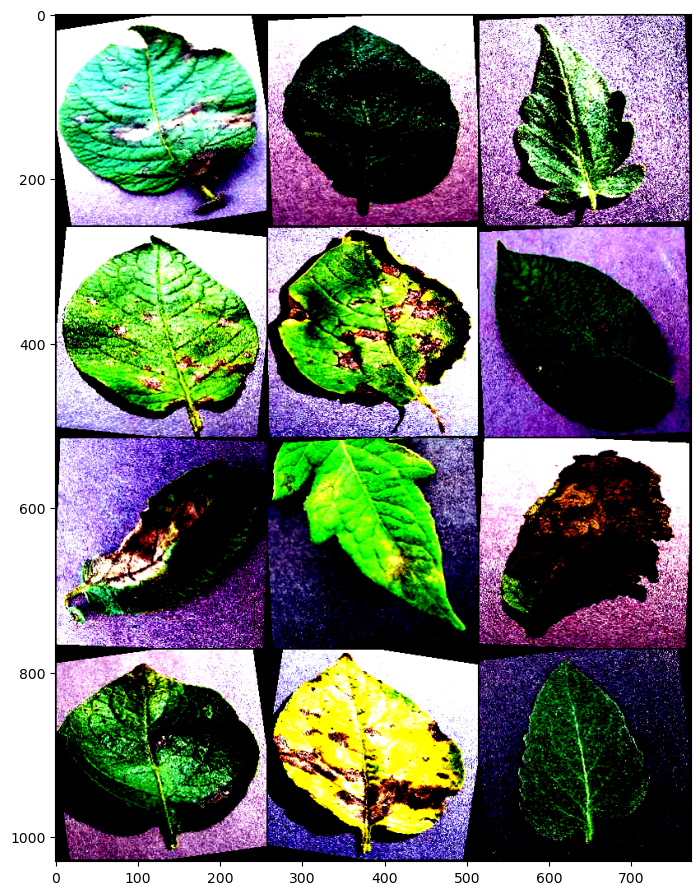

In [11]:
show_transformed_images(v_dataset)

In [12]:
def test_transform(dataset):
    test_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])
    test_dataset=torchvision.datasets.ImageFolder(root=dataset,transform=test_transforms)
    test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=32,shuffle=True)
    mean,std=get_mean_std(test_loader)
    test_transforms = transforms.Compose([
        transforms.Resize((255,255)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))
    ])
    test_dataset=torchvision.datasets.ImageFolder(root=dataset,transform=test_transforms)
    test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=32,shuffle=True)
    return test_loader,test_dataset

In [13]:
def set_device():
    device = "mps" if torch.backends.mps.is_available() else "cpu"
    return device

In [70]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

In [72]:
resnet_18=models.resnet18(pretrained=False)

/Users/bhanuprakash/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/bhanuprakash/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [74]:
features=resnet_18.fc.in_features
number_of_classes=2
resnet_18.fc=nn.Linear(features,number_of_classes)
device=set_device()
resnet_18=resnet_18.to(device)
loss_fn=nn.CrossEntropyLoss()

optimizer=optim.SGD(resnet_18.parameters(),lr=0.01, momentum=0.9, weight_decay=0.003)


In [ ]:
def train_nn(model,train_loader,criterion, optimizer,n_epoches):
    device=set_device()
    for epoch in range(n_epoches):
        print("Ecpoch: %(epoch+1)")
        model.train()
        running_loss=0.0
        running_correct=0.0
        total=0
        
        for data in train_dataset:
            images,labels=data
            images=images.to(device)
            labels=labels.to(device)
            total+=label.size(0)
            
            optimizer.zero_grad()
            
            outputs=model(images)
            
            _,